word division

In [ ]:
import jieba
#coding=utf-8
import jieba
import re

input_path='D:/HuaweiMoveData/Users/jan/Desktop/5507/分词/分词与LDA/data.txt'
output_path1='D:/HuaweiMoveData/Users/jan/Desktop/5507/分词/处理.txt'
output_path2='D:/HuaweiMoveData/Users/jan/Desktop/5507/分词/分词与LDA/分词.txt'
stopwords_path='D:/HuaweiMoveData/Users/jan/Desktop/5507/分词/停用词.txt'
 

with open(input_path, 'r', encoding='utf-8') as file:
    content = file.read()

#Delete non-Chinese characters
content = re.sub(u'\n|\\r', '', content) #delete enter
content = re.sub(r'[^\w\s]', '', content) #delete special characters
content = re.sub(r'\d+(\.\d+)?', '', content)#delete numbers


with open(output_path1,'w',encoding='utf-8') as file:
    file.write(content)
    
# Set the stop word
print('start read stopwords data.')
stopwords = []
with open(stopwords_path, 'r', encoding='utf-8') as f:
    for line in f:
        if len(line)>0:
            stopwords.append(line.strip())
 
def tokenizer(s):
    words = []
    cut = jieba.cut(s,cut_all=False)
    for word in cut:
        if word not in stopwords:
            words.append(word)
    return words
 
#Read file data, divide words, and output to file
with open(output_path2,'w',encoding='utf-8') as o:
    with open(output_path1, 'r', encoding='utf-8') as f:
        for line in f:
            s=tokenizer(line.strip())
            o.write(" ".join(s)+"\n")

print("end")

LDA model - caculate the perplexity and coherence


Trying with 2 topics:

Trying with 3 topics:

Trying with 4 topics:

Trying with 5 topics:

Trying with 6 topics:

Trying with 7 topics:

Trying with 8 topics:

Trying with 9 topics:

Trying with 10 topics:


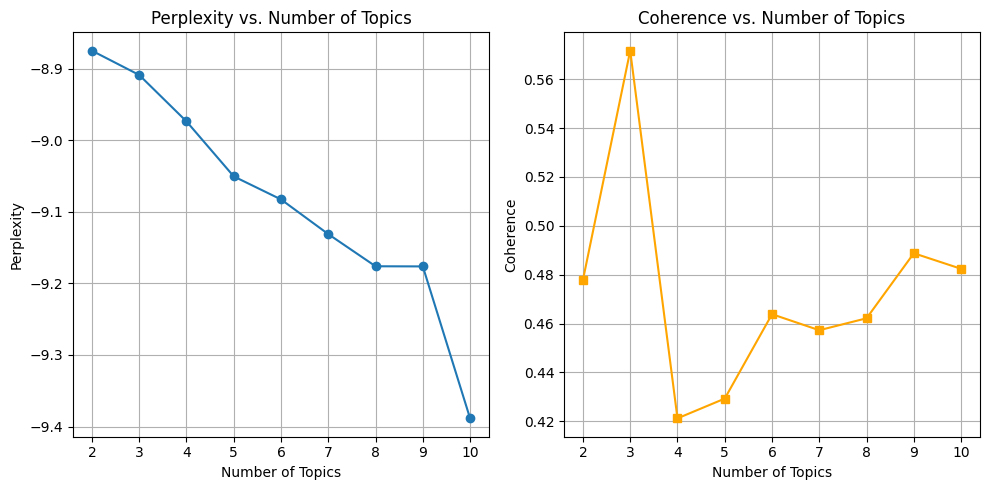

end


In [1]:
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

def main():
    PATH ='D:/HuaweiMoveData/Users/jan/Desktop/5507/分词/分词与LDA/临时结果.txt'
    file_object2 = open(PATH, encoding='utf-8', errors='ignore').read().split('\n')  # read the content
    data_set = []  # set up the list
    for i in range(len(file_object2)):
        result = []
        seg_list = file_object2[i].split()
        for w in seg_list:  # read every line
            result.append(w)
        data_set.append(result)

    dictionary = corpora.Dictionary(data_set)  # set up the dictionary
    corpus = [dictionary.doc2bow(text) for text in data_set]  # count the words frequency

    # try different  numbers of different themes
    num_topics_range = range(2, 11)
    perplexity_scores = []
    coherence_scores = []
    for num_topics in num_topics_range:
        print(f"\nTrying with {num_topics} topics:")
        # # practice LDA model 
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=1)
        # calculate perplexity
        perplexity_score = lda_model.log_perplexity(corpus)
        perplexity_scores.append(perplexity_score)
        # calculate coherence
        coherence_model = CoherenceModel(model=lda_model, texts=data_set, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)

    # plot the graph
    plt.figure(figsize=(10, 5))

    # plot the perplexity graph
    plt.subplot(1, 2, 1)
    plt.plot(num_topics_range, perplexity_scores, marker='o')
    plt.title('Perplexity vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Perplexity')
    plt.grid(True)
    plt.savefig("困惑度.jpg")

    # plot the coherence graph
    plt.subplot(1, 2, 2)
    plt.plot(num_topics_range, coherence_scores, marker='s', color='orange')
    plt.title('Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence')
    plt.grid(True)
    plt.savefig("一致性.jpg")

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    import multiprocessing
    multiprocessing.freeze_support()
    main()
    print('end')


plot the LDA model

In [2]:
import pyLDAvis
from gensim.models import LdaModel
import pandas as pd
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

# prepare the data
PATH = "D:/HuaweiMoveData/Users/jan/Desktop/5507/分词/分词与LDA/临时结果.txt"
 
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #set up the list 
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :
        result.append(w)
    data_set.append(result)
 
dictionary = corpora.Dictionary(data_set)  # set up the dictionary
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, passes = 30 ,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    print(i[bz][0])
    
import pyLDAvis.gensim
data = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(data, 'D:/HuaweiMoveData/Users/jan/Desktop/LDA模型9.html')
pyLDAvis.display(data)

print('end')

[(0, '0.031*"哈里斯" + 0.023*"女性" + 0.015*"特朗普" + 0.013*"珍珠" + 0.007*"大学" + 0.007*"珍珠项链" + 0.006*"总统" + 0.006*"支持" + 0.006*"媒体" + 0.006*"竞选"'), (1, '0.023*"州" + 0.018*"总统" + 0.017*"选举人" + 0.014*"特朗普" + 0.012*"赢得" + 0.011*"投票" + 0.008*"张" + 0.008*"11" + 0.007*"摇摆" + 0.007*"候选人"'), (2, '0.071*"哈里斯" + 0.048*"特朗普" + 0.024*"竞选" + 0.013*"总统" + 0.010*"政治" + 0.009*"演讲" + 0.007*"团队" + 0.007*"民主党" + 0.006*"支持" + 0.006*"新闻"'), (3, '0.026*"总统" + 0.021*"穿" + 0.020*"哈里斯" + 0.019*"搭" + 0.013*"副" + 0.009*"民主党" + 0.008*"拜登" + 0.008*"候选人" + 0.007*"特朗普" + 0.007*"珍珠"'), (4, '0.011*"工作" + 0.011*"政治" + 0.009*"能力" + 0.009*"法律" + 0.007*"形象" + 0.007*"一种" + 0.006*"选择" + 0.005*"相关" + 0.005*"哈里斯" + 0.005*"领域"'), (5, '0.025*"政策" + 0.020*"经济" + 0.019*"特朗普" + 0.017*"哈里斯" + 0.011*"亿美元" + 0.011*"移民" + 0.010*"影响" + 0.009*"川普" + 0.009*"中国" + 0.007*"关税"'), (6, '0.021*"哈里斯" + 0.017*"支持" + 0.013*"投票" + 0.010*"喜欢" + 0.009*"民主党" + 0.008*"移民" + 0.007*"女性" + 0.007*"选民" + 0.006*"身份" + 0.006*"非法"'), (7, '0.032*"特朗普" + 0.028*"川普" + 